<a href="https://colab.research.google.com/github/jamshid1255/Mobile-sensor-based-distance-estimation-LSTM/blob/main/Mobile_sensors_based_platform_for_COVID_19_contact_tracing_leveraging_artificial_intelligence_LSTM_Paper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Mobile sensors based platform for COVID-19 contact tracing leveraging artificial intelligence

### https://link.springer.com/article/10.1007/s12652-023-04713-7

### Long-Short Term Memory model for mobile/user distance estimation between 1,2 and 3 meter using mobile sensors data

##Feature Data LSTM training

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [ ]:
col_list = ["real_distance", "behavior",
            "rssi_mean","ax_mean","ay_mean","az_mean","gx_mean","gy_mean","gz_mean","speed_mean",
            "rssi_median","ax_median","ay_median","az_median","gx_median","gy_median","gz_median","speed_median",
            "rssi_std","ax_std","ay_std","az_std","gx_std","gy_std","gz_std","speed_std",
            "rssi_var","ax_var","ay_var","az_var","gx_var","gy_var","gz_var","speed_var"]
data = pd.read_csv('/content/drive/MyDrive/after data fixing researchpaper/featureAlldatav4.csv', usecols=col_list)
data = data.dropna()

X = data[["rssi_mean","ax_mean","ay_mean","az_mean","gx_mean","gy_mean","gz_mean","speed_mean",
            "rssi_median","ax_median","ay_median","az_median","gx_median","gy_median","gz_median","speed_median",
            "rssi_std","ax_std","ay_std","az_std","gx_std","gy_std","gz_std","speed_std",
            "rssi_var","ax_var","ay_var","az_var","gx_var","gy_var","gz_var","speed_var"]]
y = data[['real_distance']]

In [ ]:
random_seed = 1024
n_time_steps = 200
n_features = 32
step = 1
n_classes = 3
batch_size = 512
learning_rate = 0.0025
l2_loss = 0.0015
n_epochs = 50
window = 200

In [ ]:
from scipy import stats
segments = []
labels = []

for i in range(0,  data.shape[0]- n_time_steps):

    rssi_mean = data['rssi_mean'].values[i: i + window]

    ax_mean = data['ax_mean'].values[i: i + window]

    ay_mean = data['ay_mean'].values[i: i + window]

    az_mean = data['az_mean'].values[i: i + window]

    gx_mean = data['gx_mean'].values[i: i + window]

    gy_mean = data['gy_mean'].values[i: i + window]

    gz_mean = data['gz_mean'].values[i: i + window]

    speed_mean = data['speed_mean'].values[i: i + window]

    rssi_median = data['rssi_median'].values[i: i + window]

    ax_median = data['ax_median'].values[i: i + window]

    ay_median = data['ay_median'].values[i: i + window]

    az_median = data['az_median'].values[i: i + window]

    gx_median = data['gx_median'].values[i: i + window]

    gy_median = data['gy_median'].values[i: i + window]

    gz_median = data['gz_median'].values[i: i + window]

    speed_median = data['speed_median'].values[i: i + window]

    rssi_std = data['rssi_std'].values[i: i + window]

    ax_std = data['ax_std'].values[i: i + window]

    ay_std = data['ay_std'].values[i: i + window]

    az_std = data['az_std'].values[i: i + window]

    gx_std = data['gx_std'].values[i: i + window]

    gy_std = data['gy_std'].values[i: i + window]

    gz_std = data['gz_std'].values[i: i + window]

    speed_std = data['speed_std'].values[i: i + window]

    rssi_var = data['rssi_var'].values[i: i + window]

    ax_var = data['ax_var'].values[i: i + window]

    ay_var = data['ay_var'].values[i: i + window]

    az_var = data['az_var'].values[i: i + window]

    gx_var = data['gx_var'].values[i: i + window]

    gy_var = data['gy_var'].values[i: i + window]

    gz_var = data['gz_var'].values[i: i + window]

    speed_var = data['speed_var'].values[i: i + window]

    label = stats.mode(data['real_distance'][i: i + window])[0][0]

    segments.append([rssi_mean,ax_mean,ay_mean,az_mean,gx_mean,gy_mean,gz_mean,speed_mean,rssi_median,ax_median,ay_median,az_median,gx_median,gy_median,gz_median,speed_median,rssi_var,ax_var,ay_var,az_var,gx_var,gy_var,gz_var,speed_var,rssi_std,ax_std,ay_std,az_std,gx_std,gy_std,gz_std,speed_std])

    labels.append(label)

#reshape the segments which is (list of arrays) to a list
reshaped_segments = np.asarray(segments, dtype= np.float32).reshape(-1, n_time_steps, n_features)

labels = np.asarray(pd.get_dummies(labels), dtype = np.float32)

In [ ]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import LSTM, Dense, Flatten, Dropout

X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels, test_size = 0.2, random_state = random_seed)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15494, 200, 32)
(3874, 200, 32)
(15494, 3)
(3874, 3)


In [ ]:
model = Sequential()

model.add(LSTM(units = 64,return_sequences=True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(LSTM(32,return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(16,return_sequences=True))
model.add(LSTM(16))
model.add(Dropout(0.5))
model.add(Dense(units = 64, activation='relu'))



# Softmax layer
model.add(Dense(y_train.shape[1], activation = 'softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

In [ ]:
history = model.fit(X_train, y_train, epochs = n_epochs, validation_split = 0.2, batch_size = batch_size, verbose = 1)

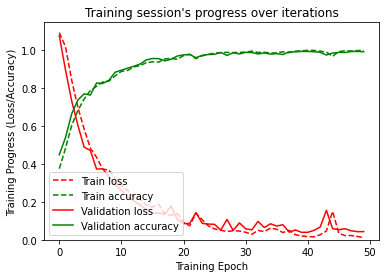

In [ ]:
plt.plot(np.array(history.history['loss']), "r--", label = "Train loss")
plt.plot(np.array(history.history['accuracy']), "g--", label = "Train accuracy")
plt.plot(np.array(history.history['val_loss']), "r-", label = "Validation loss")
plt.plot(np.array(history.history['val_accuracy']), "g-", label = "Validation accuracy")
plt.title("Training session's progress over iterations")
plt.legend(loc='lower left')
plt.ylabel('Training Progress (Loss/Accuracy)')
plt.xlabel('Training Epoch')
plt.ylim(0)
plt.savefig('/content/drive/MyDrive/LSTM.png',bbox_inches='tight')
plt.show()

In [ ]:
loss, accuracy = model.evaluate(X_test, y_test, batch_size = batch_size, verbose = 1)
print("Test Accuracy :", accuracy*100,"%")
print("Test Loss :", loss)

8/8 [==============================] - 5s 555ms/step - loss: 0.0356 - accuracy: 0.9907
Test Accuracy : 99.0707278251648 %
Test Loss : 0.03555399924516678


In [ ]:
from sklearn import metrics

from sklearn.metrics import mean_absolute_error as MAE
predicted = model.predict(X_test)
mae = MAE(y_test, predicted)
print('Mean Absolute Error: %.3f' % (mae))
r2=metrics.r2_score(y_test, predicted)
print('Coefficient of determination :', r2, '%')
#print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, yhat)*100,'%')
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predicted))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))

Mean Absolute Error: 0.007
Coefficient of determination : 0.9773756959354664 %
Mean Squared Error: 0.004993255
Root Mean Squared Error: 0.07066297


{'0': {'precision': 0.9886282871357498, 'recall': 0.9949928469241774, 'f1-score': 0.9918003565062389, 'support': 1398}, '1': {'precision': 0.9921540656205421, 'recall': 0.9879261363636364, 'f1-score': 0.9900355871886122, 'support': 1408}, '2': {'precision': 0.9915492957746479, 'recall': 0.9887640449438202, 'f1-score': 0.990154711673699, 'support': 1068}, 'accuracy': 0.9907072792978833, 'macro avg': {'precision': 0.9907772161769799, 'recall': 0.9905610094105447, 'f1-score': 0.9906635517895167, 'support': 3874}, 'weighted avg': {'precision': 0.9907150019867903, 'recall': 0.9907072792978833, 'f1-score': 0.9907052754839438, 'support': 3874}}


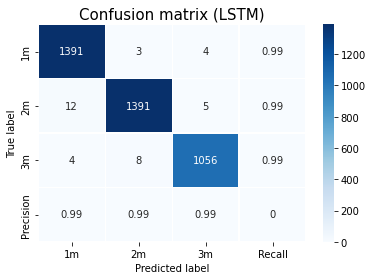

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report
predictions = predicted
class_names = ['1m', '2m', '3m','Recall']
class_names_1 = ['1m', '2m', '3m','Precision']
max_test = np.argmax(y_test, axis=1)

max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

report = classification_report(max_test, max_predictions, output_dict=True )
print(report)
pre=[]
rec=[]
for i in range(3):
  pre.append(np.round(report[str(i)]['precision'], 2))
  rec.append(np.round([report[str(i)]['recall']], 2))

pre.append(0)

an_array = np.append(confusion_matrix, rec, axis=1)
row = np.array(pre)
arr = np.vstack([an_array,row])

sns.heatmap(arr, xticklabels = class_names, yticklabels = class_names_1, annot = True, linewidths = 0.2, cmap=plt.cm.Blues,fmt='g')
plt.title("Confusion matrix (LSTM)", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.savefig('/content/drive/MyDrive/LSTM Confusion.png',bbox_inches='tight')
plt.show()

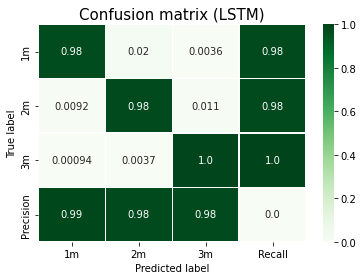

In [ ]:
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score,classification_report
predictions = model.predict(X_test)
class_names = ['1m', '2m', '3m','Recall']
class_names_1 = ['1m', '2m', '3m','Precision']
max_test = np.argmax(y_test, axis=1)

max_predictions = np.argmax(predictions, axis=1)
confusion_matrix = metrics.confusion_matrix(max_test, max_predictions)

confusion_matrix = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]

report = classification_report(max_test, max_predictions, output_dict=True )

pre=[]
rec=[]
for i in range(3):
  pre.append(np.round(report[str(i)]['precision'], 2))
  rec.append(np.round([report[str(i)]['recall']], 2))

pre.append(0)

an_array = np.append(confusion_matrix, rec, axis=1)
row = np.array(pre)

arr = np.vstack([an_array,row])

sns.heatmap(arr, xticklabels = class_names, yticklabels = class_names_1, annot = True, linewidths = 0.2, cmap=plt.cm.Greens,fmt='.2')
plt.title("Confusion matrix (LSTM)", fontsize = 15)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()